In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [2]:
import cv2
import os
import numpy as np
import seaborn as sns
data_dir = "dataset"
data_dir2 = "dataset"
data_dir3 = "dataset"
labels = ['CN70_79','MCI70_79']
labels2 = ['MCI60_69','AD60_69']
labels3 = ['CN80P','AD80P']
img_size = 256
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
def get_data2(data_dir2):
    data2 = [] 
    for label2 in labels2: 
        path = os.path.join(data_dir2, label2)
        class_num = labels2.index(label2)
        for img2 in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img2))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data2.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data2)
def get_data3(data_dir3):
    data3 = [] 
    for label3 in labels3: 
        path = os.path.join(data_dir3, label3)
        class_num = labels3.index(label3)
        for img3 in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img3))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data3.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data3)

<ipython-input-2-3ed3baf5f7ca>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)
C:\Users\LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

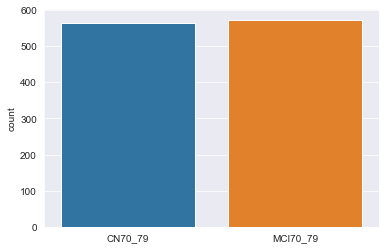

In [3]:
train = get_data(r"C:\Users\LAPTOP\OWN CODE\dataset\train")
val = get_data(r"C:\Users\LAPTOP\OWN CODE\dataset\test")
l = []
for i in train:
    if(i[1] == 0):
        l.append("CN70_79")
    if(i[1]==1):
        l.append("MCI70_79")
sns.set_style('darkgrid')
sns.countplot(l)


<ipython-input-2-3ed3baf5f7ca>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data2)
C:\Users\LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

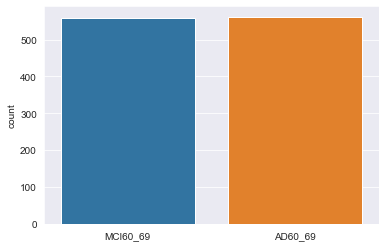

In [4]:
train2 = get_data2(r"C:\Users\LAPTOP\OWN CODE\dataset\train")
val2 = get_data2(r"C:\Users\LAPTOP\OWN CODE\dataset\test")
l2 = []
for i in train2:
    if(i[1] == 0):
        l2.append("MCI60_69")
    if(i[1]==1):
        l2.append("AD60_69")
sns.set_style('darkgrid')
sns.countplot(l2)

<ipython-input-2-3ed3baf5f7ca>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data3)
C:\Users\LAPTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

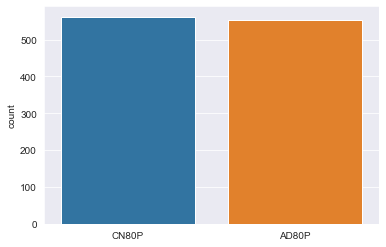

In [5]:
train3 = get_data3(r"C:\Users\LAPTOP\OWN CODE\dataset\train")
val3 = get_data3(r"C:\Users\LAPTOP\OWN CODE\dataset\test")
l3 = []
for i in train3:
    if(i[1] == 0):
        l3.append("CN80P")
    if(i[1]==1):
        l3.append("AD80P")
sns.set_style('darkgrid')
sns.countplot(l3)

In [6]:
x_train = []
y_train = []
x_val = []
y_valA = []

x_train2 = []
y_train2 = []
x_val2 = []
y_valB = []


x_train3 = []
y_train3 = []
x_val3 = []
y_valC = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_valA.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_valA, 10)


for feature2, label2 in train2:
    x_train2.append(feature2)
    y_train2.append(label2)

for feature2, label2 in val2:
    x_val2.append(feature2)
    y_valB.append(label2)

# Normalize the data
x_train2 = np.array(x_train2) / 255
x_val2 = np.array(x_val2) / 255

y_train2 = keras.utils.to_categorical(y_train2, 10)
y_val2 = keras.utils.to_categorical(y_valB, 10)


for feature3, label3 in train3:
    x_train3.append(feature3)
    y_train3.append(label3)

for feature3, label3 in val3:
    x_val3.append(feature3)
    y_valC.append(label3)

# Normalize the data
x_train3 = np.array(x_train3) / 255
x_val3 = np.array(x_val3) / 255

y_train3 = keras.utils.to_categorical(y_train3, 10)
y_val3 = keras.utils.to_categorical(y_valC, 10)


In [19]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2,activation='softmax')  
    
    
])

In [20]:
import tensorflow as tf
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 128)       46592     
_________________________________________________________________
batch_normalization_10 (Batc (None, 62, 62, 128)       512       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 31, 31, 256)       819456    
_________________________________________________________________
batch_normalization_11 (Batc (None, 31, 31, 256)       1024      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 256)      

In [21]:
train_ds=tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_ds=tf.data.Dataset.from_tensor_slices((x_val,y_val))

In [22]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(256, 256))
    
    return image,label

In [23]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 1136
Test size: 80


In [24]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

In [25]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [26]:
history=model.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/50


ValueError: in user code:

    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\LAPTOP\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (32, 10) and (32, 2) are incompatible


In [13]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

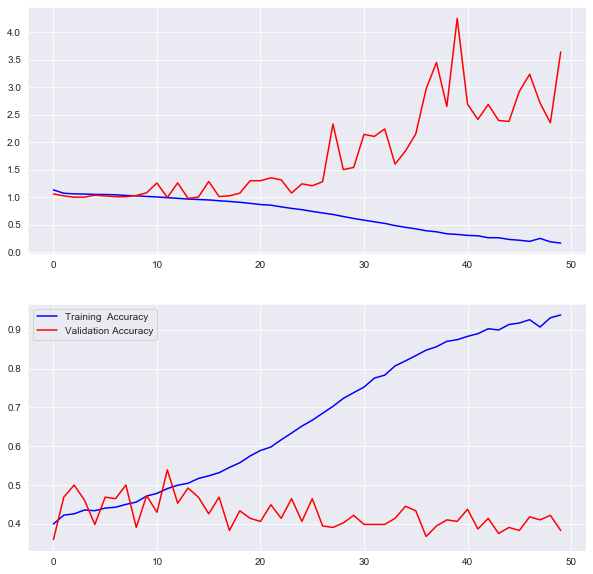

In [14]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [15]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.5390625
